# Import modules

In [1]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
====Network Bandwidth========
1	0-5 GBps
2	5- 20 GBps
3	20 -50GBps
4	above  50 GBps
	
====User Type====
1	1-100
2	101-1000
3	1-1000
4	Above 1000

====Processor Speed (Per processor)====
1	1GHz-2GHz 
2	2GHz-4GHz
3	Above 4Hz
4	1GHz-4GHz 
	
====Ram====
1	16-32GB
2	32-64GB
3	Above 64GB
4	16-64GB
	
====vCPUs====
1	2 to 12
2	12 to 20
3	20  to 32
4	12 to 32

====OutPut====
1	St1.Nano
2	Mt2.GP
3	Lt3.Large
4	Lt4.Xlarge
5	Mt5.Prem

"""


'\n====Network Bandwidth========\n1\t0-5 GBps\n2\t5- 20 GBps\n3\t20 -50GBps\n4\tabove  50 GBps\n\t\n====User Type====\n1\t1-100\n2\t101-1000\n3\t1-1000\n4\tAbove 1000\n\n====Processor Speed (Per processor)====\n1\t1GHz-2GHz \n2\t2GHz-4GHz\n3\tAbove 4Hz\n4\t1GHz-4GHz \n\t\n====Ram====\n1\t16-32GB\n2\t32-64GB\n3\tAbove 64GB\n4\t16-64GB\n\t\n====vCPUs====\n1\t2 to 12\n2\t12 to 20\n3\t20  to 32\n4\t12 to 32\n\n====OutPut====\n1\tSt1.Nano\n2\tMt2.GP\n3\tLt3.Large\n4\tLt4.Xlarge\n5\tMt5.Prem\n\n'

# Model Training

In [3]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    error = mae(data_outputs, predictions).numpy()

    solution_fitness = 1.0 / (error + 0.00000001)

    return solution_fitness

def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')



In [4]:
input_layer  = tensorflow.keras.layers.Input(5)
dense_layer1 = tensorflow.keras.layers.Dense(10, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.array([[1, 1, 1, 1, 1],
                           [3, 2, 2, 2, 2],
                           [4, 3, 2, 3, 3],
                           [4, 4, 3, 3, 4],
                           [4, 1, 4, 4, 4]])

# Data outputs
data_outputs = numpy.array([[1],
                            [2],
                            [3],
                            [4],
                            [5]])

ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)
ga_instance.run()

Generation = 1
Fitness    = 0.8424271239196104

Generation = 2
Fitness    = 1.6973444004018925

Generation = 3
Fitness    = 1.6973444004018925

Generation = 4
Fitness    = 1.6973444004018925

Generation = 5
Fitness    = 1.9552462931810954

Generation = 6
Fitness    = 1.9552462931810954

Generation = 7
Fitness    = 1.9552462931810954

Generation = 8
Fitness    = 1.9552462931810954

Generation = 9
Fitness    = 2.490875629017135

Generation = 10
Fitness    = 2.490875629017135

Generation = 11
Fitness    = 2.490875629017135

Generation = 12
Fitness    = 2.797329445992827

Generation = 13
Fitness    = 2.797329445992827

Generation = 14
Fitness    = 3.2829766334214194

Generation = 15
Fitness    = 3.2829766334214194

Generation = 16
Fitness    = 3.2829766334214194

Generation = 17
Fitness    = 3.2829766334214194

Generation = 18
Fitness    = 3.6447379569839633

Generation = 19
Fitness    = 3.6447379569839633

Generation = 20
Fitness    = 3.6447379569839633

Generation = 21
Fitness    = 3.644

Generation = 169
Fitness    = 12.456353877235244

Generation = 170
Fitness    = 12.456353877235244

Generation = 171
Fitness    = 12.456353877235244

Generation = 172
Fitness    = 12.456353877235244

Generation = 173
Fitness    = 12.456353877235244

Generation = 174
Fitness    = 12.456353877235244

Generation = 175
Fitness    = 12.456353877235244

Generation = 176
Fitness    = 12.456353877235244

Generation = 177
Fitness    = 12.456353877235244

Generation = 178
Fitness    = 12.456353877235244

Generation = 179
Fitness    = 12.456353877235244

Generation = 180
Fitness    = 12.456353877235244

Generation = 181
Fitness    = 12.456353877235244

Generation = 182
Fitness    = 12.456353877235244

Generation = 183
Fitness    = 12.456353877235244

Generation = 184
Fitness    = 12.456353877235244

Generation = 185
Fitness    = 12.456353877235244

Generation = 186
Fitness    = 12.456353877235244

Generation = 187
Fitness    = 12.456353877235244

Generation = 188
Fitness    = 15.166860650690479



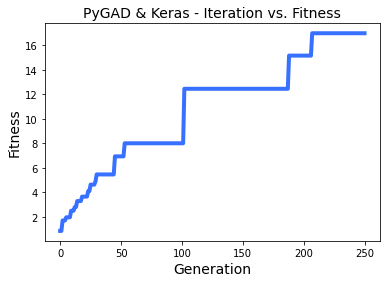

In [5]:
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [6]:
# Returning the details of the best solution.
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

Parameters of the best solution:
[ 0.09378995  0.48185867  0.0927966  -0.05735474 -0.67896708 -0.62387216
 -0.09523955 -1.08145153  0.49577174 -1.57134074 -0.87011968 -1.43368035
  0.31155637 -0.46426549 -0.16664011  0.99294134 -0.79380331  0.32461597
  0.48182973 -0.32840082 -0.48150804  0.57320756  0.23315201 -2.31469701
 -0.92040325 -0.56311612  0.48787284 -0.1586436   0.18751981  1.06099032
  0.93622607  0.18571163 -1.55080931 -0.22909758  0.22801203  0.6011692
 -0.04672251 -0.67648927  1.14690352 -0.55886844  0.53839928  0.99231127
 -0.40982622 -1.0562906  -1.26592277 -0.53653481  0.86959964 -1.49388511
  0.48674606 -0.50534267  0.23831459 -0.29363894 -0.25288406 -0.67993269
  0.93144095  1.62442441 -0.80256489 -0.05953331 -0.44825688  0.0366009
 -0.37935559  0.32793609 -1.11144944 -1.26059795 -0.80427963  0.5782356
  0.4583552  -1.97426911  0.36506165  2.47008259 -0.82066985]

Length of the solution is: 71

Fitness value of the best solution:
16.994694251094696



Predictions:
 [[0.89509636]
 [1.964586  ]
 [2.9779139 ]
 [3.8930972 ]
 [5.024903  ]]

Correct Outputs:
 [[1]
 [2]
 [3]
 [4]
 [5]]



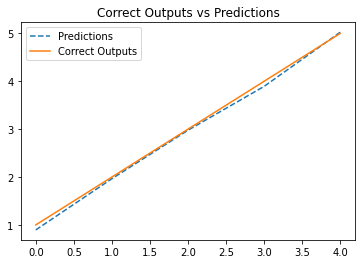

Absolute Error:
 0.058841884


In [7]:
# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

# Correct Outputs vs Predictions plot.
plt.plot(predictions,'--',label="Predictions")
plt.plot(data_outputs,label="Correct Outputs")
plt.title('Correct Outputs vs Predictions')
plt.legend()
plt.show()

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error:\n", abs_error)

# Create Model File

In [8]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
#     print(prepared_df)
    y_pred = model.predict(df)
    return y_pred 

In [9]:
config = {
    'NetworkBandwidth': [1],
    'UserType': [1],
    'ProcessorSpeed': [1],
    'RAM': [1],
    'vCPUs': [1]
}

predictValuePre = predict_mpg(config, model)
predictValue = round(predictValuePre[0][0]) - 1

OutPutList=["St1.Nano","Mt2.GP","Lt3.Large","Lt4.Xlarge"]

OutPutList[int(predictValue)]

'St1.Nano'

In [10]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [11]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 

Loaded model from disk


In [12]:
predictValuePre = predict_mpg(config, model)
predictValue = round(predictValuePre[0][0]) - 1

OutPutList=["St1.Nano","Mt2.GP","Lt3.Large","Lt4.Xlarge"]

OutPutList[int(predictValue)]

'St1.Nano'